## Import libraries

We import the k-nearest neighbors classifier **KNeighborsClassifier** from the **neighbors** module of the **scikit-learn** library. This classifier is used to perform k-nearest neighbor classification tasks.

The **train_test_split** function from the **model_selection** module of the **scikit-learn** library is designed to split data into training and test.

In addition, we import the **numpy**, **matplotlib** and **pandas** libraries. We need the first one for working with arrays, the second one for vizualizing results, and the third one allows us to work with a data table.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Create DataFrame

Create a DataFrame **df_bananas** and load data from the **banana_quality.csv** file.

In [45]:
df_bananas = pd.read_csv('banana_quality.csv')
df_bananas.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [46]:
print("Total number of rows:", df_bananas.shape[0])

Total number of rows: 8000


In [47]:
df_bananas['Quality'] = df_bananas['Quality'].replace({'Good': 1, 'Bad': -1})
df_bananas.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


## Dividing the data into training and test sets

We use the **train_test_split** function from the **scikit-learn** library to split the data into training and test sets.
The result of running **train_test_split** will be four data arrays:

 - X_train: training set of features;
 - X_test: test set of features;
 - Y_train: training set of target variables (class labels);
 - Y_test: test set of target variables (class labels).
 
The data is split randomly. Typically, about 75-80% of the data is training data.

In [49]:
# Features
X = df_bananas.drop('Quality', axis = 1)

# Target
Y = df_bananas['Quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

## Create and train the model at different values of k

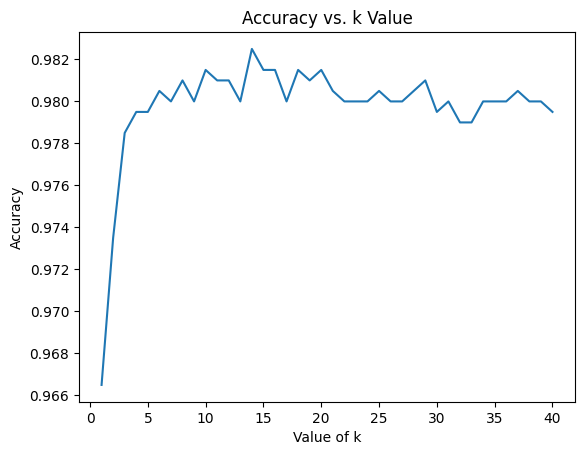

{1: 0.9665, 2: 0.9735, 3: 0.9785, 4: 0.9795, 5: 0.9795, 6: 0.9805, 7: 0.98, 8: 0.981, 9: 0.98, 10: 0.9815, 11: 0.981, 12: 0.981, 13: 0.98, 14: 0.9825, 15: 0.9815, 16: 0.9815, 17: 0.98, 18: 0.9815, 19: 0.981, 20: 0.9815, 21: 0.9805, 22: 0.98, 23: 0.98, 24: 0.98, 25: 0.9805, 26: 0.98, 27: 0.98, 28: 0.9805, 29: 0.981, 30: 0.9795, 31: 0.98, 32: 0.979, 33: 0.979, 34: 0.98, 35: 0.98, 36: 0.98, 37: 0.9805, 38: 0.98, 39: 0.98, 40: 0.9795}


In [50]:
# Create the list of values of k
k_values = range(1, 41)

# Lists for storage of accuracy and k values
accuracies = []
k_values_used = []

for k in k_values:
    # Create a model
    knn = KNeighborsClassifier(n_neighbors=k)
    # train the model
    knn.fit(X_train, Y_train)
    
    # Make prediction
    Y_pred = knn.predict(X_test)
    
    # Calculate the accuracy and store it into the array
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)
    k_values_used.append(k)

# Draw the graph
plt.plot(k_values_used, accuracies)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value')
plt.show()

# Create a dictionary to see the points of the graph
dependency = dict(zip(k_values_used, accuracies))
print(dependency)

## Choose the best model

As we can see, the best accuracy (0.9825) is reached at k = 14. Therefore, we would like to use this value in our model.

In [55]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

## Classify new data

In [61]:
feature_names = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
#X_new = pd.DataFrame([[-2.0, 0.44, 3.01, -1.44, 0.32, 2.45, 0.28]], columns=feature_names)
X_new = pd.DataFrame([[-2.0, 0.44, 3.01, -1.44, 0.32, 2.45, 0.28]], columns=feature_names)

prediction = knn.predict(X_new)
if prediction == 1:
    print("This banana is GOOD")
else:
    print("This banana is BAD")

This banana is GOOD
